In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from coupling_plot_utils import *
from scipy.stats import wilcoxon
%matplotlib inline

In [2]:
m1_path = 'fits/nhp/indy_20160411_01.h5'
a1_path = 'fits/ecog/ecog_HG.h5'
v1_paths = ['fits/pvc11/monkey1.h5', 'fits/pvc11/monkey2.h5', 'fits/pvc11/monkey3.h5']

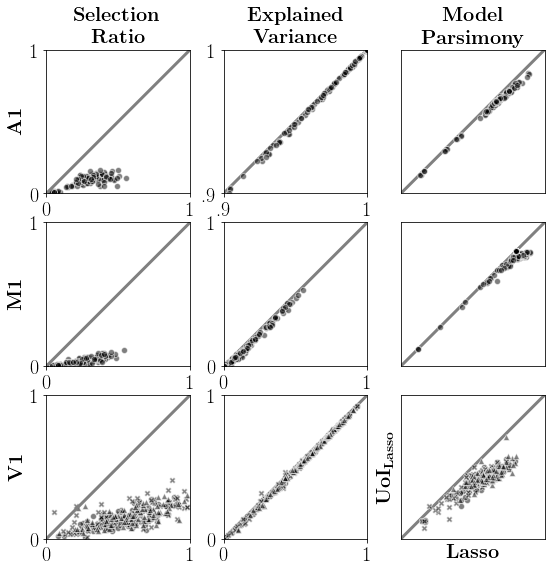

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(9, 9))

metrics = ['selection_ratio', 'r2', 'BIC']

for idx, metric in enumerate(metrics):
    plot_metric(fits_path=a1_path, metric=metric, y='UoI_Lasso_AIC', ax=axes[0, idx])

for idx, metric in enumerate(metrics):
    plot_metric(fits_path=m1_path, metric=metric, y='UoI_Lasso_AIC', ax=axes[1, idx])
    
for idx, metric in enumerate(metrics):
    plot_metric(fits_path=v1_paths[0], metric=metric, y='UoI_Lasso_AIC', ax=axes[2, idx], marker='o')
    plot_metric(fits_path=v1_paths[1], metric=metric, y='UoI_Lasso_AIC', ax=axes[2, idx], marker='X')
    plot_metric(fits_path=v1_paths[2], metric=metric, y='UoI_Lasso_AIC', ax=axes[2, idx], marker='^')

# selection ratio plots
for idx in range(3):
    axes[idx, 0].plot([0, 1], [0, 1], color='gray', linewidth=3)
    axes[idx, 0].set_xlim([0, 1])
    axes[idx, 0].set_xticks([0, 1])
    axes[idx, 0].set_ylim([0, 1])
    axes[idx, 0].set_yticks([0, 1])
    axes[idx, 0].set_aspect('equal')

# r2 plots
for idx in range(3):
    axes[idx, 1].plot([0, 1], [0, 1], color='gray', linewidth=3, zorder=-1)
    if idx == 0:
        axes[idx, 1].set_xlim([0.9, 1])
        axes[idx, 1].set_xticks([0.9, 1])
        axes[idx, 1].set_xticklabels(['.9', '1'])
        axes[idx, 1].set_ylim([0.9, 1])
        axes[idx, 1].set_yticks([0.9, 1])
        axes[idx, 1].set_yticklabels(['.9', '1'])
    else:
        axes[idx, 1].set_xlim([0, 1])
        axes[idx, 1].set_xticks([0, 1])
        axes[idx, 1].set_ylim([0, 1])
        axes[idx, 1].set_yticks([0, 1])
    axes[idx, 1].set_aspect('equal')
    

# BIC
bounds = [-4000, 500]
axes[0, 2].set_xlim(bounds)
axes[0, 2].set_ylim(bounds)
axes[0, 2].plot(bounds, bounds, color='gray', linewidth=3, zorder=-1)

bounds = [-3000, 750]
axes[1, 2].set_xlim(bounds)
axes[1, 2].set_ylim(bounds)
axes[1, 2].plot(bounds, bounds, color='gray', linewidth=3, zorder=-1)

bounds = [-750, 750]
axes[2, 2].set_xlim(bounds)
axes[2, 2].set_ylim(bounds)
axes[2, 2].plot(bounds, bounds, color='gray', linewidth=3, zorder=-1)

for idx in range(3):
    axes[idx, 2].set_xticks([])
    axes[idx, 2].set_yticks([])
    axes[idx, 2].set_aspect('equal')

axes[0, 0].set_ylabel(r'\textbf{A1}', fontsize=20)
axes[1, 0].set_ylabel(r'\textbf{M1}', fontsize=20)
axes[2, 0].set_ylabel(r'\textbf{V1}', fontsize=20)

axes[0, 0].set_title(r'\textbf{Selection}' '\n' r'\textbf{Ratio}', fontsize=20)
axes[0, 1].set_title(r'\textbf{Explained}' '\n' r'\textbf{Variance}', fontsize=20)
axes[0, 2].set_title(r'\textbf{Model}' '\n' r'\textbf{Parsimony}', fontsize=20)

axes[-1, -1].set_xlabel(r'\textbf{Lasso}', fontsize=20)
axes[-1, -1].set_ylabel(r'\textbf{UoI}$_{\textbf{Lasso}}$', fontsize=20)

plt.savefig('Fig5_coupling.pdf', bbox_inches='tight')

In [28]:
lasso = get_dataset(v1_paths[2], metric='r2', key='Lasso')
uoi = get_dataset(v1_paths[2], metric='r2', key='UoI_Lasso_AIC')

np.mean(lasso - uoi)/((np.std(lasso) + np.std(uoi))/2)

0.06584817254938145

In [30]:
np.std(uoi)

0.19896662135882134

In [17]:
wilcoxon_coupling(fits_path=v1_paths[0], metric='r2', y='UoI_Lasso_R2')

WilcoxonResult(statistic=162.0, pvalue=3.5592407552988533e-17)